In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/mGalarnyk/Tutorial_Data/master/Abalone/abalone.csv')

In [4]:
df.isnull().sum()

Sex               0
Length            1
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [5]:
# Remove entire rows from dataframe if they contain any nans in them or 'all'
# this may not be the best strategy for our dataset
df = df.dropna(how = 'any')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4176 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4176 non-null   object 
 1   Length          4176 non-null   float64
 2   Diameter        4176 non-null   float64
 3   Height          4176 non-null   float64
 4   Whole weight    4176 non-null   float64
 5   Shucked weight  4176 non-null   float64
 6   Viscera weight  4176 non-null   float64
 7   Shell weight    4176 non-null   float64
 8   Rings           4176 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 326.2+ KB


In [8]:
X = df.loc[:, ['Length']].values
y = df.loc[:, 'Rings'].values

In [10]:
reg = LinearRegression(fit_intercept= True, normalize = False)

In [11]:
reg.fit(X,y)

LinearRegression()

In [15]:
reg.predict(X[23].reshape(1,-1))

array([11.29144633])

In [16]:
reg.predict(X[0:50])

array([ 8.90017985,  7.33091123, 10.02108602,  8.67599862,  7.03200292,
        8.45181739, 10.24526725,  9.19908816, 10.31999433,  9.94635894,
        8.52654447,  9.4232694 , 10.09581309,  9.12436109,  9.57272355,
        7.40563831,  8.67599862,  7.55509246,  8.82545278,  7.40563831,
        7.77927369, 10.54417556, 10.31999433, 11.29144633, 10.46944848,
       10.76835679, 10.91781094, 11.14199218, 10.69362971, 10.76835679,
       12.26289834, 12.03871711, 12.26289834, 12.63653373,  9.04963401,
       10.17054017,  8.82545278, 10.69362971,  7.40563831,  8.82545278,
       10.31999433,  5.68691552,  5.16382598,  5.23855306,  7.92872785,
        9.12436109,  8.97490693,  6.95727584,  9.94635894,  9.87163186])

In [46]:
score = reg.score(X, y)
m = reg.coef_[0]
b = reg.intercept_

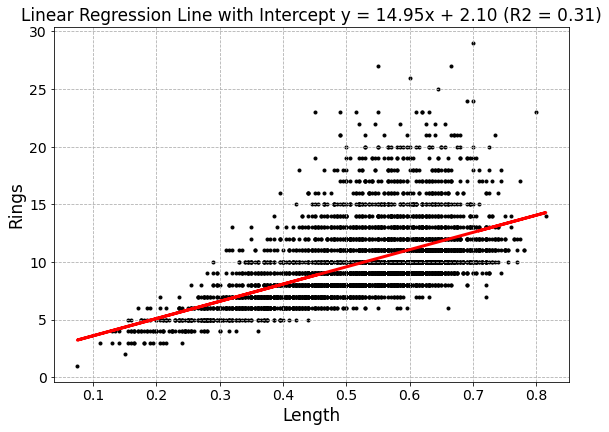

In [77]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))

ax.scatter(X, y, c='k', s=9)
ax.plot(X, reg.predict(X), c='r', linewidth=3)
ax.grid(linestyle='--')
ax.tick_params(labelsize = 14)
ax.set_xlabel('Length', fontsize=17)
ax.set_ylabel('Rings', fontsize=17)
ax.set_title(f'Linear Regression Line with Intercept y = {m:.2f}x + {b:.2f} (R2 = {score:.2f})',fontsize=17)
plt.tight_layout(pad=0.7, w_pad=0.8, h_pad=0.5)
fig.savefig('scatterplot1', dpi=300)

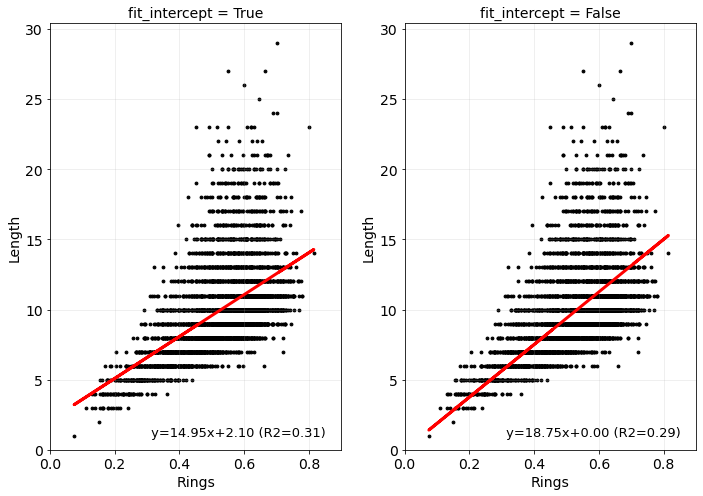

In [88]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10,7));

for index, model in enumerate([LinearRegression(fit_intercept=True), LinearRegression(fit_intercept=False)]): 
    model.fit(X,y)
    predictions = model.predict(X)
    score = model.score(X, y)
    m = model.coef_[0]
    b = model.intercept_
    
    ax[index].scatter(X, y, color='black', s=8);
    ax[index].plot(X, model.predict(X), color='red',linewidth=3);

    ax[index].tick_params(labelsize = 14)
    ax[index].set_xlabel('Rings', fontsize = 14)
    ax[index].set_ylabel('Length', fontsize = 14)
    ax[index].set_xlim(left = 0, right = .9)
    ax[index].set_ylim(bottom = 0)
    ax[index].grid(alpha=0.25)
    
    ax[index].text(.30, 1, " y={:.2f}x+{:.2f} (R2={:.2f})".format(m, b, score), fontsize = 13)

ax[0].set_title('fit_intercept = True', fontsize = 14)   
ax[1].set_title('fit_intercept = False',  fontsize = 14)    
fig.tight_layout()